In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descripcion.txt

In [2]:
description = open('data_description.txt', 'r')
lineas = description.readlines()
for i in lineas:
  print(i)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

# Analisis de los Datos

In [3]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

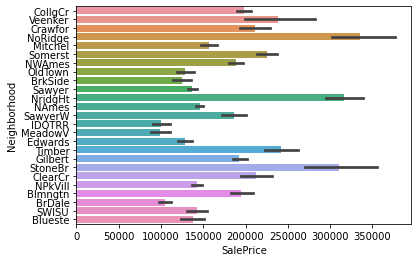

In [4]:
sns.barplot(x = df['SalePrice'], y = df['Neighborhood'])

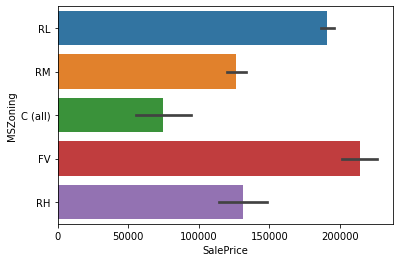

In [5]:
sns.barplot(x = df['SalePrice'], y = df['MSZoning'])

In [6]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [7]:
categoricas = df.select_dtypes(include=['object']).columns
df2 = df.copy()
df2[categoricas]
df2[categoricas] = df2[categoricas].apply(lambda x : pd.factorize(x)[0])
corr = df2.corr(method = 'pearson')
corr['SalePrice'].sort_values()

Foundation     -0.429678
HeatingQC      -0.427649
BsmtFinType1   -0.299343
ExterQual      -0.265015
CentralAir     -0.251328
                  ...   
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, Length: 81, dtype: float64

In [8]:
importante = corr[corr['SalePrice'] > 0.5]['SalePrice']
#importante2 = corr[corr['SalePrice'] < -0.5]['SalePrice']
#importante = importante1 + importante2
importante = list(importante.index)
#importante.remove('FireplaceQu')
#importante.remove('PoolQC')
importante

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

# Preparacion de los Datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#Eliminamos las columnas con pocos datos (mayoritariamente nulos)
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)
df = df.loc[:,importante]
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [11]:
df.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


In [12]:
#Separamos en columnas con datos numericos y columnas con datos categoricos
#dfnum = df.select_dtypes(include=['int64','float64'])
#dfnum['LotFrontage'] = dfnum['LotFrontage'].fillna(dfnum['LotFrontage'].mean())
#dfnum['MasVnrArea'] = dfnum['MasVnrArea'].fillna(0)
#dfnum['GarageYrBlt'] = dfnum['GarageYrBlt'].fillna(0)
#dfcat = df.select_dtypes(include=['object'])
#dfnum

In [13]:
#One Hot Encoding para datos 
#dfohc = pd.get_dummies(dfcat)
#dfohc

In [14]:
#Unificamos DataFrames
#df = pd.merge(dfnum,dfohc, left_index=True, right_index=True)
#df

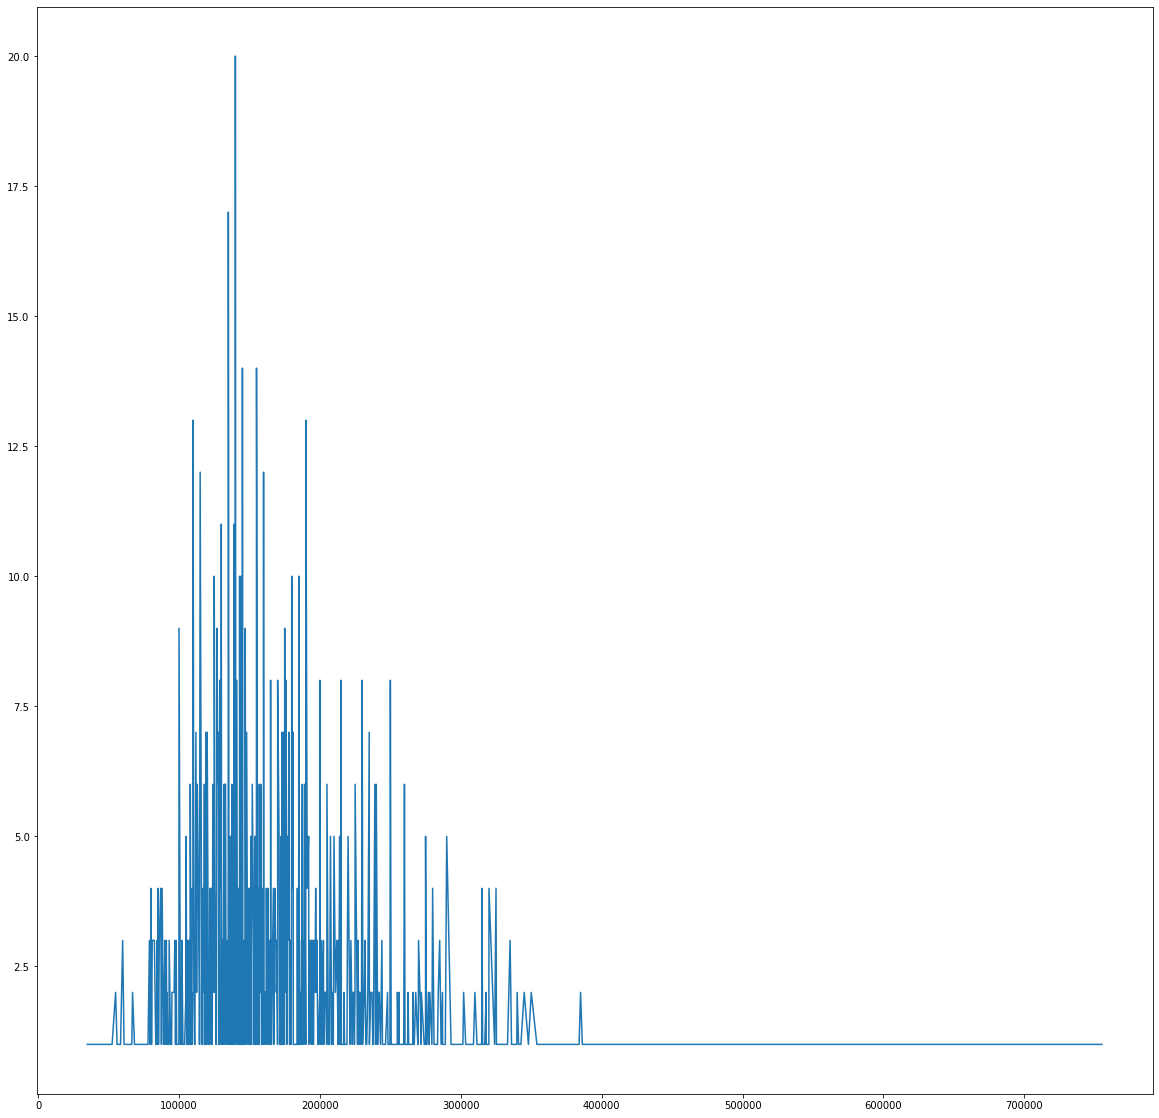

In [15]:
plt.figure(figsize = (20,20))
df['SalePrice'].value_counts().sort_index().plot.line()

# Entrenamos y aplicamos el modelo

In [16]:
#Cargamos Test y Igualamos columnas
test = pd.read_csv('test.csv')
test2 = test.copy()
test = test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)
testnum = test.select_dtypes(include=['int64'])
testcat = test.select_dtypes(include=['object'])
testohc = pd.get_dummies(testcat)
test = pd.merge(testnum,testohc, left_index=True, right_index=True)
common_cols=list(set.intersection(set(df), set(test)))
test = test[common_cols]

In [17]:
#Dividimos los datos objetivo
df2 = df.copy()
etiqueta = df['SalePrice']
df = df[common_cols]
df.shape

(1460, 7)

In [18]:
training = df2[df2.SalePrice < 400000]
Y_training = training['SalePrice']
X_training = training[common_cols]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
#Armamos un set para trainig y uno para testeo
X_train,X_test,Y_train,Y_test = train_test_split(X_training, Y_training, test_size = 0.25, random_state=42)

In [21]:
correlated_features = set()
correlation_matrix = corr
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
X_training.drop(labels=correlated_features, axis=1, inplace=True, errors ='ignore')
X_train.drop(labels=correlated_features, axis=1, inplace=True, errors ='ignore')
X_test.drop(labels=correlated_features, axis=1, inplace=True, errors = 'ignore')
test.drop(labels=correlated_features, axis=1, inplace=True, errors = 'ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#Entrenamos el modelo
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#Probamos el modelo
Y_pred = model.predict(X_train)
print(mean_squared_error(Y_train,Y_pred))
print(mean_absolute_error(Y_train,Y_pred))
print(model.score(X_train,Y_train))

1160176934.7597694
23792.41006344875
0.7315518252432696


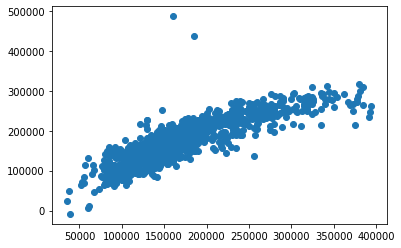

In [24]:
plt.scatter(Y_train, Y_pred)

In [25]:
#Aplicamos el modelo a los datos de testeo
model.score(X_test,Y_test)

0.778648467919851

In [26]:
#Armamos un set para training y uno para testeo
model.fit(X_training,Y_training)
prediction = model.predict(test)

In [27]:
submission = pd.DataFrame({'Id':test2['Id'],'SalePrice': prediction})
filename = 'House-Prediction.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: House-Prediction.csv
